## What to do?
In this programming assignment we will train a classifier to identify type of a particle. There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise.

Different particle types remain different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system.


### Download
Download the dataset from here https://github.com/hse-aml/hadron-collider-machine-learning/releases/tag/Week_2

In [2]:
##importing necessary libraries

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import utils

## Download Data

In [3]:
##importing the required training data
data = pd.read_csv("training.csv.gz")

In [4]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


## What all the data have??


Here, Spd stands for Scintillating Pad Detector, Prs - Preshower, Ecal - electromagnetic calorimeter, Hcal - hadronic calorimeter, Brem denotes traces of the particles that were deflected by detecto

<li>Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
<li>ID - id value for tracks (presents only in the test file for the submitting purposes)
<li>Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
<li>FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
<li>FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
<li>FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
<li>FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
<li>FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
<li>FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
<li>FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
<li>FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
<li>SpdE - energy deposit associated to the track in the Spd
<li>PrsE - energy deposit associated to the track in the Prs
<li>EcalE - energy deposit associated to the track in the Hcal
<li>HcalE - energy deposit associated to the track in the Hcal
<li>PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
<li>BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
<li>TrackP - particle momentum
<li>TrackPt - particle transverse momentum
<li>TrackNDoFSubdetector1 - number of degrees of freedom for track fit using hits in the tracking sub-detector1
<li>TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
<li>TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
<li>TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the tracking sub-detector2
<li>TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
<li>TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
<li>TrackDistanceToZ - distance between track and z-axis (beam axis)
<li>Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter
<li>Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
<li>EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
<li>EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
<li>EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
<li>HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
<li>HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
<li>RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
<li>RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
<li>RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
<li>RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
<li>RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
<li>RICH_DLLbeBCK - delta log-likelihood for a particle candidate to be background using information from RICH
<li>RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
<li>RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
<li>RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
<li>RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
<li>MuonFlag - muon flag (is this track muon) which is determined from muon stations
<li>MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
<li>MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
<li>MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
<li>DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
<li>DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
<li>DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
<li>DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
<li>GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

### Looking at all the labels 

Since the training data has six classes , each corresponding to a datatype


In [5]:
set(data.Label)

{'Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'}

In [6]:
## it's better to convert them into numbers

data['Class'] = utils.get_class_ids(data.Label.values)
set(data.Class)

{0, 1, 2, 3, 4, 5}

## Define training features

In [7]:
## defining training features

features = list(set(data.columns) - {'Label', 'Class'})
features

['RICH_DLLbeElectron',
 'FlagHcal',
 'FlagBrem',
 'EcalDLLbeElectron',
 'TrackPt',
 'RICHpFlagElectron',
 'MuonFlag',
 'FlagRICH1',
 'FlagMuon',
 'FlagRICH2',
 'EcalShowerLongitudinalParameter',
 'MuonLLbeMuon',
 'RICH_DLLbeProton',
 'PrsDLLbeElectron',
 'TrackP',
 'MuonLLbeBCK',
 'FlagPrs',
 'EcalE',
 'Calo2dFitQuality',
 'FlagEcal',
 'RICHpFlagKaon',
 'TrackQualitySubdetector1',
 'TrackDistanceToZ',
 'RICHpFlagMuon',
 'PrsE',
 'DLLproton',
 'HcalDLLbeElectron',
 'TrackNDoF',
 'HcalE',
 'RICH_DLLbeMuon',
 'EcalDLLbeMuon',
 'GhostProbability',
 'FlagSpd',
 'SpdE',
 'DLLelectron',
 'TrackQualityPerNDoF',
 'BremDLLbeElectron',
 'TrackQualitySubdetector2',
 'RICHpFlagPion',
 'Calo3dFitQuality',
 'RICHpFlagProton',
 'DLLmuon',
 'RICH_DLLbeBCK',
 'RICH_DLLbeKaon',
 'DLLkaon',
 'MuonLooseFlag',
 'TrackNDoFSubdetector1',
 'TrackNDoFSubdetector2',
 'HcalDLLbeMuon']

## Doing the test-train Split

In [8]:
train_data, validation_data = train_test_split(data, random_state=11, train_size=0.90)

In [9]:
len(train_data), len(validation_data)

(1080000, 120000)

## Using the SciKit Learn CLassifier

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
%%time 
gb = GradientBoostingClassifier(learning_rate=0.9, n_estimators=90, subsample=0.5, random_state=18,
                                min_samples_leaf=150, max_depth=5)
gb.fit(train_data[features].values, train_data.Class.values)

Wall time: 2h 22min 36s


GradientBoostingClassifier(learning_rate=0.9, max_depth=5, min_samples_leaf=150,
                           n_estimators=90, random_state=18, subsample=0.5)

## Log Loss on the Cross Validation Sample

In [32]:
# predict each track
proba_gb = gb.predict_proba(validation_data[features].values)

In [33]:
log_loss(validation_data.Class.values, proba_gb)

0.6030905418900945

## Keras Neural Network

On this step our task is to train Keras NN classifier to provide lower log loss value.

TASK: our task is to tune the classifier parameters to achieve the lowest log loss value on the validation sample you can. Data preprocessing may help us to improve our score.

In [34]:
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils

In [35]:
def nn_model(input_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=input_dim))
    model.add(Activation('tanh'))

    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam())
    return model

In [36]:
nn = nn_model(len(features))
nn.fit(train_data[features].values, np_utils.to_categorical(train_data.Class.values), verbose=1, epochs=5, batch_size=256)

Epoch 1/5
4219/4219 [==============================] - 6s 1ms/step - loss: 1.4127
Epoch 2/5
4219/4219 [==============================] - 4s 1ms/step - loss: 1.2496
Epoch 3/5
4219/4219 [==============================] - 4s 1ms/step - loss: 1.1563
Epoch 4/5
4219/4219 [==============================] - 5s 1ms/step - loss: 1.0989
Epoch 5/5
4219/4219 [==============================] - 5s 1ms/step - loss: 1.0726


### Log Loss on the Cross validation Sample

In [37]:

# predict each track
proba_nn = nn.predict_proba(validation_data[features].values)

C:\Users\Monit Sharma\anaconda 3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [38]:
log_loss(validation_data.Class.values, proba_nn)

1.0439447651753784

## Quality Metrics

Plot ROC curves and signal efficiency dependece from particle mometum and transverse momentum values.

In [39]:
proba = proba_gb

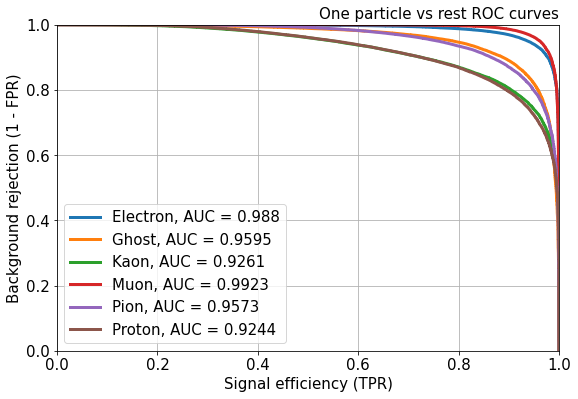

In [40]:
utils.plot_roc_curves(proba, validation_data.Class.values)

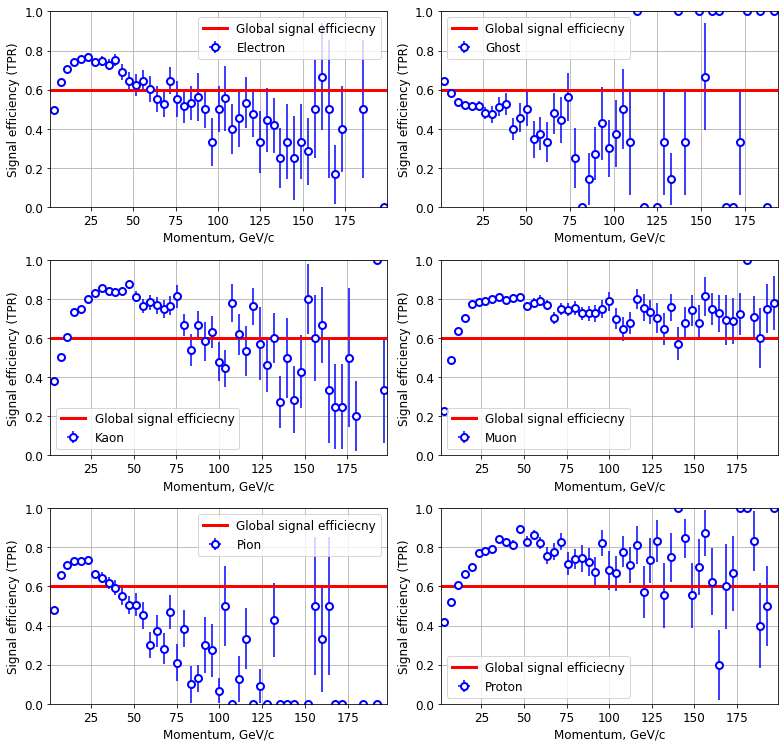

In [41]:
utils.plot_signal_efficiency_on_p(proba, validation_data.Class.values, validation_data.TrackP.values, 60, 50)
plt.show()

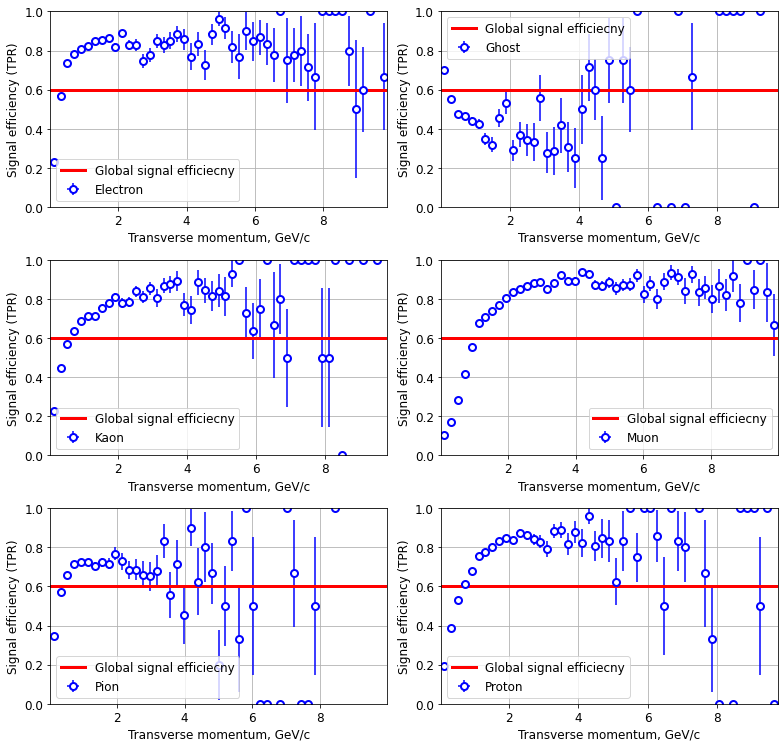

In [42]:
utils.plot_signal_efficiency_on_pt(proba, validation_data.Class.values, validation_data.TrackPt.values, 60, 50)
plt.show()

### Running on the best classifier

In [43]:
test = pd.read_csv('test.csv.gz')

In [44]:
best_model = gb

In [45]:
submit_proba = best_model.predict_proba(test[features])
submit_ids = test.ID

In [46]:
from IPython.display import FileLink
utils.create_solution(submit_ids, submit_proba, filename='submission_file.csv.gz')

C:\Users\Monit Sharma\submission_file.csv.gz